In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [63]:
df = pd.read_csv('../Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.shape

(10000, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [67]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [68]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [69]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

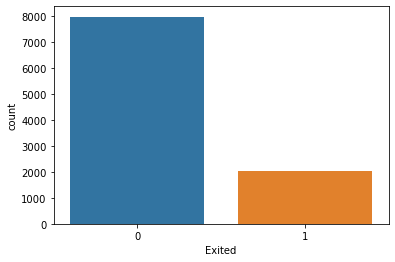

In [70]:
sns.countplot(x = 'Exited', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

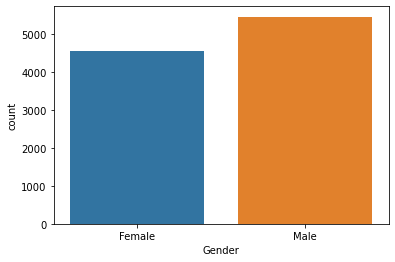

In [71]:
sns.countplot(x = 'Gender', data=df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

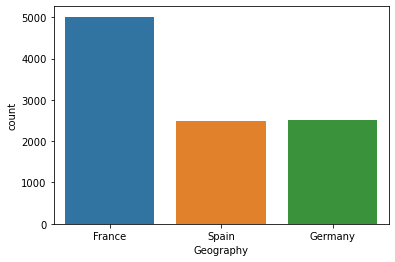

In [72]:
sns.countplot(x = 'Geography', data=df)

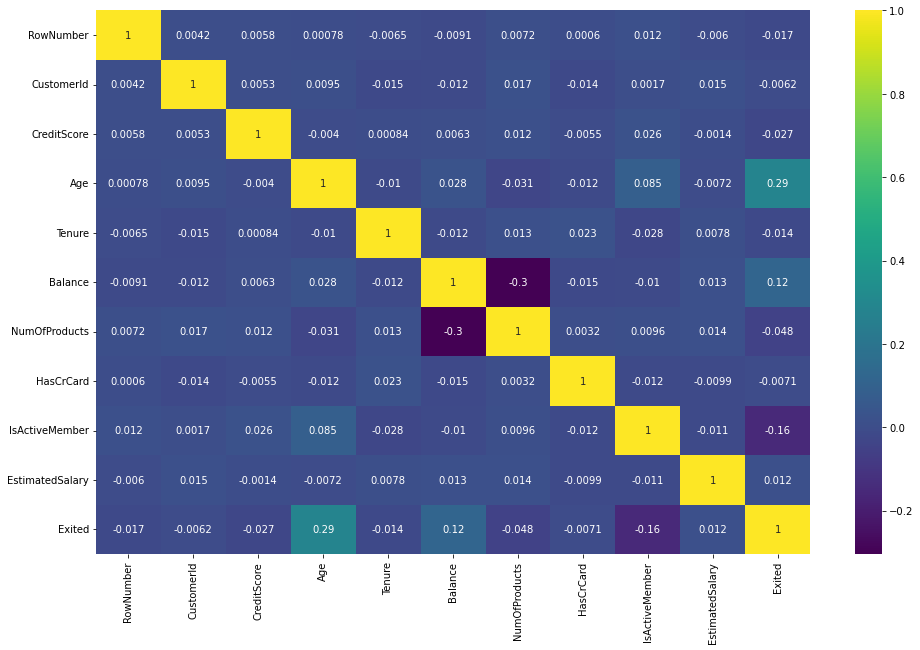

In [73]:
plt.figure(figsize=[16,10])
sns.heatmap(df.corr(), cmap="viridis", annot=True);

<AxesSubplot:xlabel='Age', ylabel='Exited'>

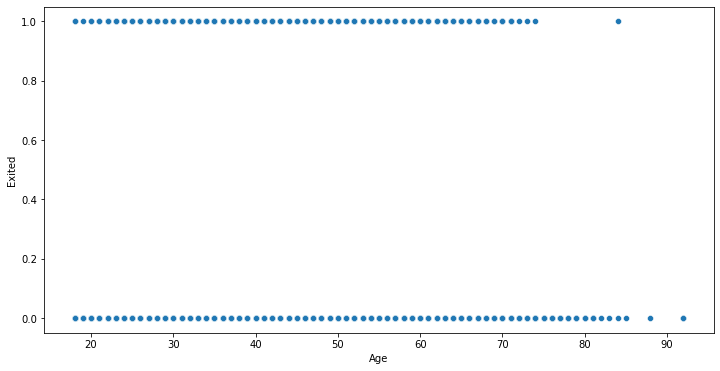

In [74]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df['Age'], y = df['Exited'])

70lerin ortasından itibaren daha yaşlı insanların ayrılma ihtimali düşük

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

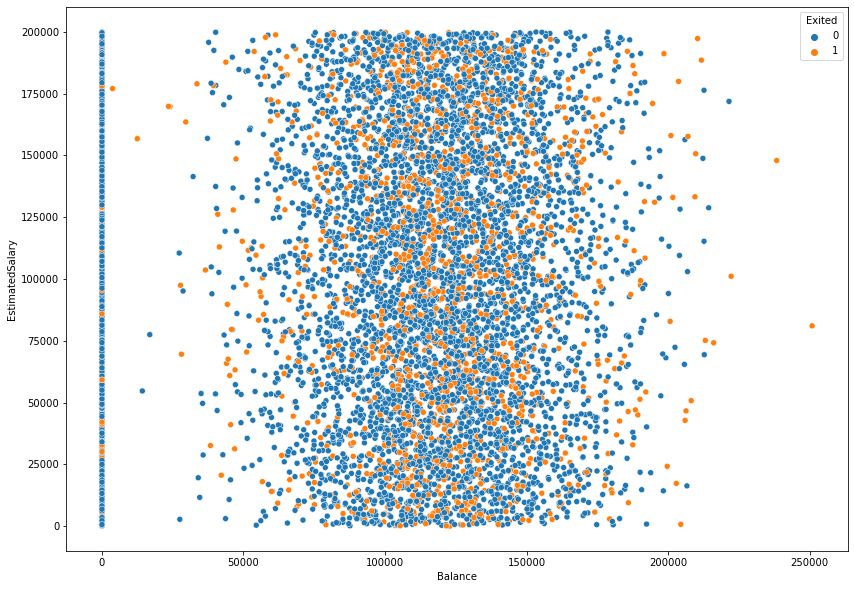

In [75]:
plt.figure(figsize = (14,10))
sns.scatterplot(x = df['Balance'], y = df['EstimatedSalary'], hue = df['Exited'])

<AxesSubplot:xlabel='Exited', ylabel='Age'>

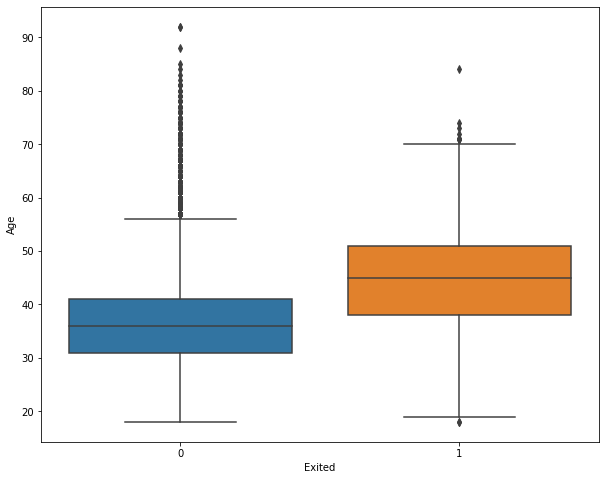

In [76]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df, x = 'Exited', y = 'Age')

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

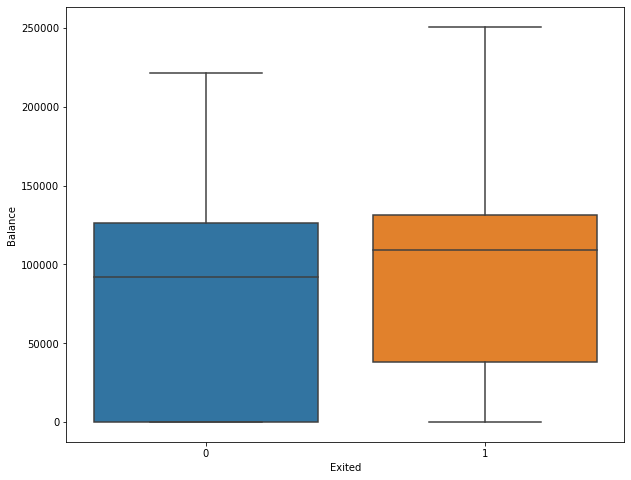

In [77]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df, x = 'Exited', y = 'Balance')

In [78]:
df.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [79]:
df.groupby('IsActiveMember')['Balance'].mean()

IsActiveMember
0    77134.376863
1    75875.422145
Name: Balance, dtype: float64

## Data Cleaning

In [80]:
df.duplicated().sum()
##if we have duplicated values

#if df.duplicated().sum():
#   df.drop_duplicates(inplace=True)

0

In [81]:
## if we have missing values

#imputer = SimpleImputer(strategy='mean')
#df[['numerical_column']] = imputer.fit_transform(df[['numerical_column']])

In [82]:
df = pd.concat([df, pd.get_dummies(df.Geography)], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [83]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x=='Female' else 0)

In [84]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [85]:
target = df['Exited']
df.drop(columns=['Exited'], axis=1, inplace=True)

In [86]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [88]:
def handle_outliers(dataFrame):
    # This function takes a pandas DataFrame as input and returns the outliers in the dataset.
    columns = dataFrame.columns
    for column in columns:
        IQR = dataFrame[column].quantile(0.75) - dataFrame[column].quantile(0.25)
        Upper_OutlierLimit = dataFrame[column].quantile(0.75) + 1.5 * IQR
        #Outliar tables
        #OutlierValues = dataFrame[(dataFrame[column]> Upper_OutlierLimit)]
        
        #To see outlier values
        print(f"{column} : {Upper_OutlierLimit}")
        dataFrame[column] = np.where(dataFrame[column]>Upper_OutlierLimit,dataFrame[column].quantile(0.85),dataFrame[column])


In [89]:
handle_outliers(df)

CreditScore : 919.0
Gender : 2.5
Age : 62.0
Tenure : 13.0
Balance : 319110.60000000003
NumOfProducts : 3.5
HasCrCard : 2.5
IsActiveMember : 2.5
EstimatedSalary : 296967.45375
France : 2.5
Germany : 2.5
Spain : 0.0


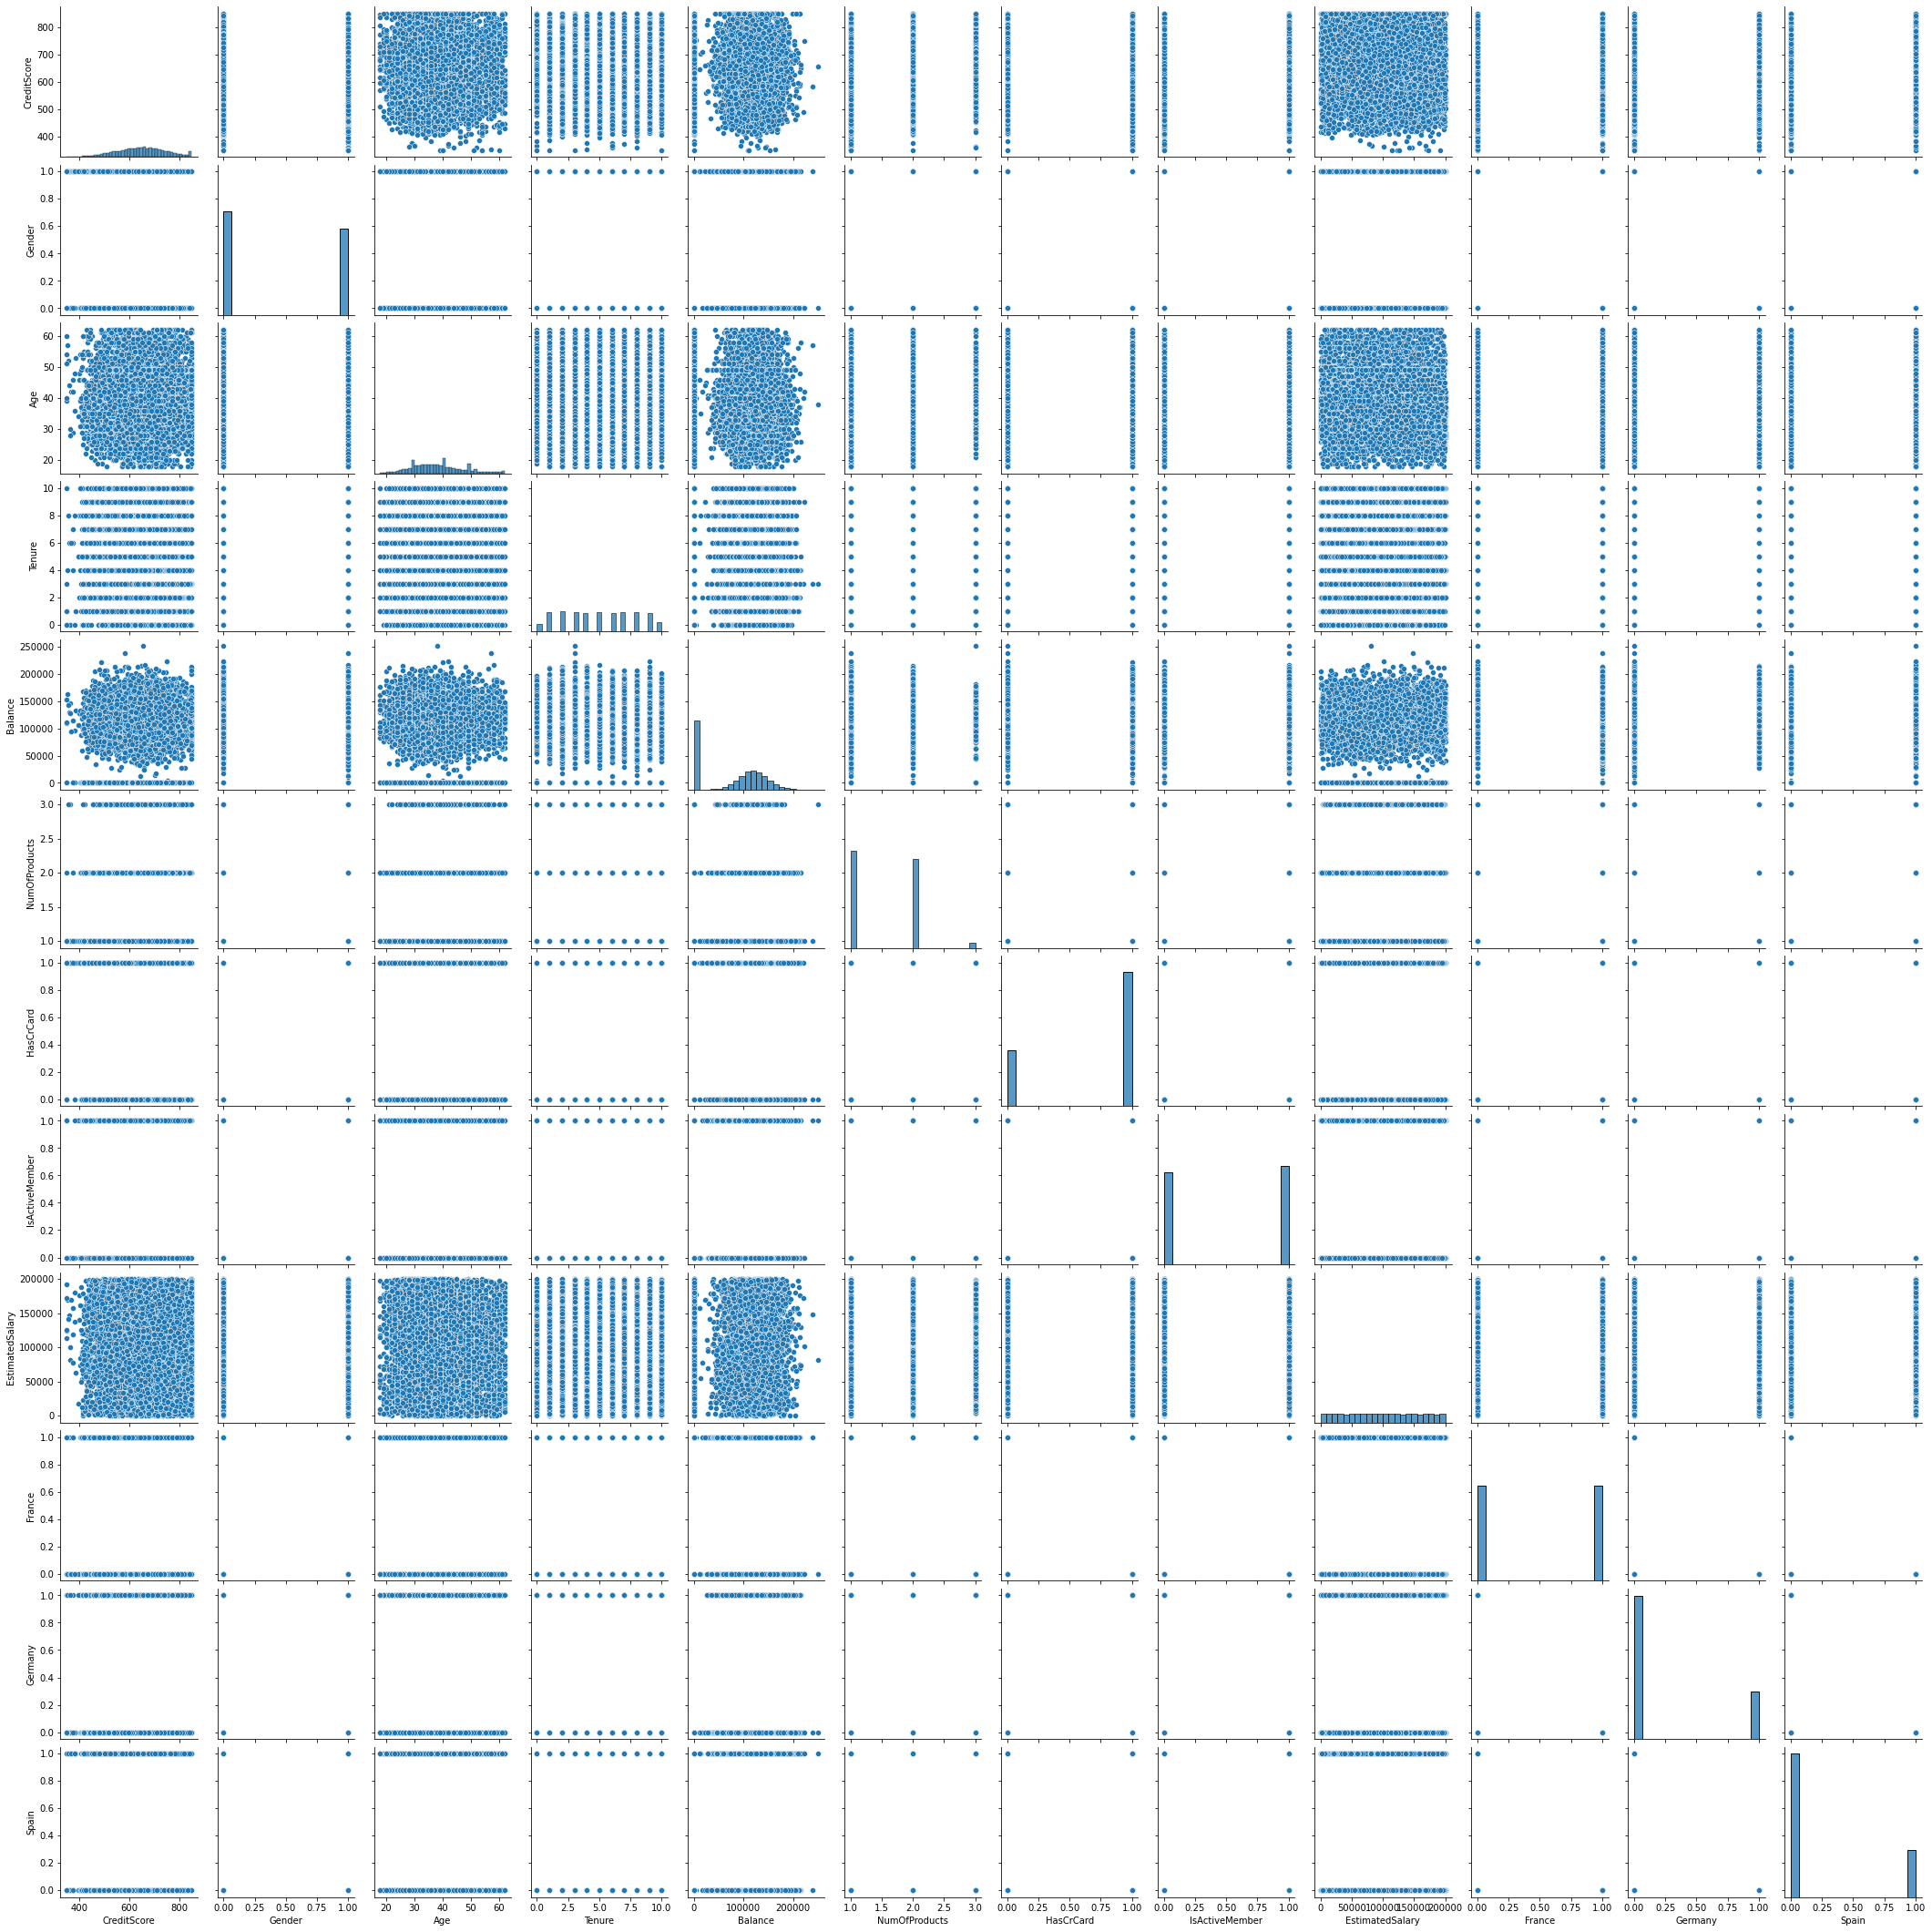

In [90]:
sns.pairplot(data=df)

In [91]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(df)

In [93]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=42)
data_res, target_res = sm.fit_resample(data, target)

# Modelling

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_res, target_res, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, classification_report,roc_auc_score
def evaluation(X_test, clf, y_test):
  y_pred = clf.predict(X_test)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_test, y_pred))
      
  print('F1-Score')
  print(np.round(f1_score(y_test, y_pred)*100,2))
    
  print('Accuracy')
  accuracy = accuracy_score(y_test, y_pred)
  print(np.round(accuracy*100, 2), '%')

def plot_loss(model):
  prob=model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds=roc_curve(y_test, prob)
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  print('AUC-ROC')
  print(np.round(roc_auc_score(y_test, prob)*100,2))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1590
           1       0.72      0.72      0.72      1596

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

F1-Score
71.84
Accuracy
71.85 %
AUC-ROC
79.15


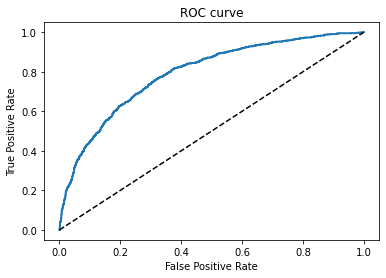

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluation(X_test, lr, y_test)
plot_loss(lr)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1590
           1       0.78      0.78      0.78      1596

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

F1-Score
78.12
Accuracy
78.03 %
AUC-ROC
86.36


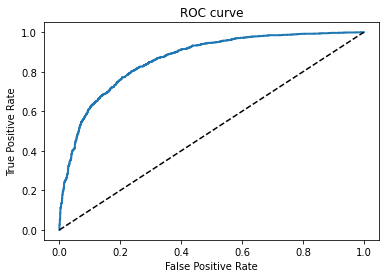

In [99]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train, y_train)
evaluation(X_test, svc_model, y_test)
plot_loss(svc_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1590
           1       0.91      0.86      0.88      1596

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

F1-Score
88.49
Accuracy
88.79 %
AUC-ROC
95.04


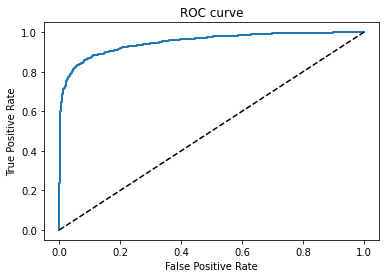

In [100]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate = 0.3, n_estimators = 180, max_depth = 3)
xgb_clf.fit(X_train, y_train)
evaluation(X_test, xgb_clf, y_test)
plot_loss(xgb_clf)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1590
           1       0.89      0.90      0.90      1596

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

F1-Score
89.93
Accuracy
89.86 %
AUC-ROC
96.43


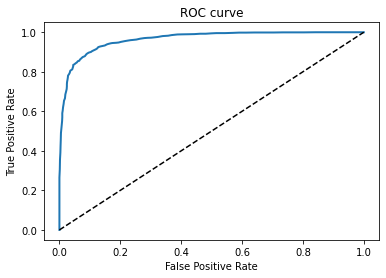

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
evaluation(X_test, rfc, y_test)
plot_loss(rfc)